In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json

In [4]:
with open("data/isoflops_curves.json") as f:
    y = json.load(f)

In [5]:
min_loss = {}
min_loss_pair = {}
for test in y:
    if test["compute_budget"] not in min_loss or test["final_loss"] < min_loss[test["compute_budget"]]:
        min_loss[test["compute_budget"]] = test["final_loss"]
        min_loss_pair[test["compute_budget"]] = test["parameters"]

In [6]:
C = []
N = []
for c, n in sorted(min_loss_pair.items()):
    print(c, n, c/(6*n)/n)
    C.append(c)
    N.append(n)

6e+18 762093419 1.7218034645274298
1e+19 806647749 2.561420595303711
3e+19 1536852354 2.1169261660709755
6e+19 1952041776 2.624350178083856
1e+20 3253402960 1.5746101068503133
3e+20 5903836027 1.4345028999495435
6e+20 6971055968 2.0577985692201377
1e+21 6859328563 3.542301616712086
3e+21 12148905329 3.3876279602099935


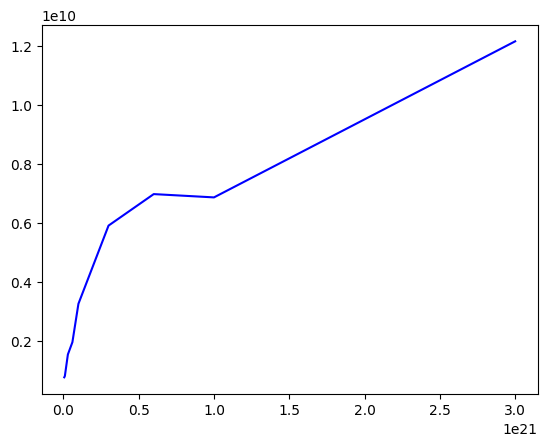

In [7]:
plt.plot(C, N, 'b-', label='data')

In [8]:
def func_N_C(x, a, b, c):
    return a * (x ** b) + c
popt, pcov = curve_fit(func_N_C, C, N, maxfev=5000)
popt

array([ 1.35024658e+03,  3.25313449e-01, -1.19220472e+09])

In [23]:
points = C  + np.linspace(4e+21, 1.1e+24, 20).tolist()

In [10]:
point

[6e+18, 1e+19, 3e+19, 6e+19, 1e+20, 3e+20, 6e+20, 1e+21, 3e+21, 1e+23, 1e+24]

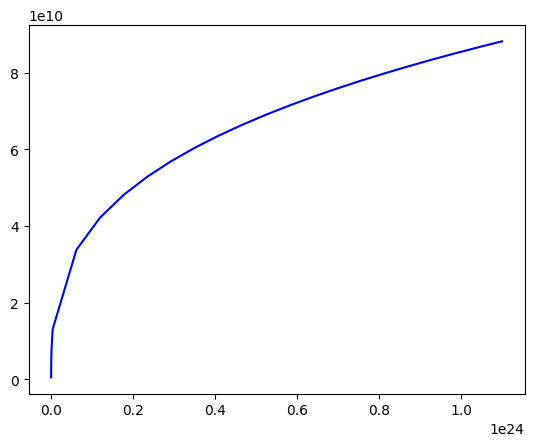

In [26]:
plt.plot(points, func_N_C(points, *popt), 'b-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [14]:
xdata = np.linspace(0, 4, 50)

In [20]:
xdata + xdata

array([0.        , 0.16326531, 0.32653061, 0.48979592, 0.65306122,
       0.81632653, 0.97959184, 1.14285714, 1.30612245, 1.46938776,
       1.63265306, 1.79591837, 1.95918367, 2.12244898, 2.28571429,
       2.44897959, 2.6122449 , 2.7755102 , 2.93877551, 3.10204082,
       3.26530612, 3.42857143, 3.59183673, 3.75510204, 3.91836735,
       4.08163265, 4.24489796, 4.40816327, 4.57142857, 4.73469388,
       4.89795918, 5.06122449, 5.2244898 , 5.3877551 , 5.55102041,
       5.71428571, 5.87755102, 6.04081633, 6.20408163, 6.36734694,
       6.53061224, 6.69387755, 6.85714286, 7.02040816, 7.18367347,
       7.34693878, 7.51020408, 7.67346939, 7.83673469, 8.        ])

In [21]:
[1]+[2]

[1, 2]